In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.Thomas_Algo_new import ThomasAlgorithm,create_tridiagonal

In [2]:
def create_matrix_3(y,x,**kwargs):  
    args=kwargs['args']
    #alpha=args[0]
    
    Nx=len(x)
    dx=x[1]-x[0]
    a=np.zeros(len(x))
    b=np.zeros(len(x))
    c=np.zeros(len(x))
    d=np.zeros(len(x))
    for n in range(1,Nx-1,1):
        D=D_0+(del_D*(n*dx/L))
        alpha=D*dt*0.5/(dx**2)
        a[n]=-alpha
        b[n]=(1+2*alpha)
        c[n]=-alpha
        d[n]=y[n]
    return a,b,c,d

In [3]:
Nx=100
xmax=10
xmin=0
D_0=1
del_D=1
L=xmax-xmin
x =np.linspace(0,xmax-xmin,Nx)
t =np.linspace(0,1,1001)  # As we increase dt, t_ana(t=lasttime) go near and near to the t=last time .
sol =np.zeros((len(t),len(x)))
sol[0,:] =np.sin(3*np.pi*x/xmax-xmin)

dx=x[1]-x[0]
dt=t[1]-t[0]

for time in range(1,len(t),1):
    sol[time]= ThomasAlgorithm(create_matrix_3,sol[time-1,:],x,args=(dt,dx,),Left='Neumann',Right='Dirichlet')

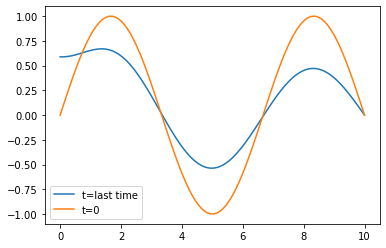

In [4]:
plt.plot(x,sol[-1,:],label="t=last time")
plt.plot(x,sol[0,:],label="t=0")
plt.legend(loc="best")
plt.show()